# 13. Bernstein-Vazirani-Algorithmus

[Link](https://www.bing.com/videos/search?q=qiskit+abraham+asfaw+Bernstein+Vazirani&&view=detail&mid=E4B91E29244AE45DF39AE4B91E29244AE45DF39A&&FORM=VRDGAR&ru=%2Fvideos%2Fsearch%3Fq%3Dqiskit%2520abraham%2520asfaw%2520Bernstein%2520Vazirani%26qs%3Dn%26form%3DQBVDMH%26%3D%2525eIhren%2520Suchverlauf%2520verwalten%2525E%26sp%3D-1%26lq%3D0%26pq%3Dqiskit%2520abraham%2520asfaw%2520bernstein%2520vazirani%26sc%3D0-39%26sk%3D%26cvid%3D0B852B9E191D46ECA690B5EBE27BBD58%26ghsh%3D0%26ghacc%3D0%26ghpl%3D)

Stellen Sie sich folgende Situation vor: Auf Ihrem Computer ist eine Geheimzahl abgespeichert. Damit es nicht zu unübersichtlich wird, gehen wir von einer 4-Bit Dualzahl aus, z. B. $1001$. Wie geht der Computer vor, wenn er diese Geheimzahl auslesen soll? Er fragt den Speicher folgendermassen ab. Er vergleicht die Seicherzelle mit dem Wert $0001$. Ein AND-Gatter stellt Übereinstimmung fest und Notiert als erste Abfrage $0001$. Nun testet er das zeite Bit mit dem Vergleich mit $0010$. Das Ergebnis ist $0$, da keine Übereinstimmung vorliegt also notiert er für die zweite Abfrage $0000$. Ebeso mit der dritten Abfrage. Die letzte Abfrage mit $1000$ liefert wieder Übereinstimmung, also notiert er $1000$. Schliesslich zählt er alle Ergebnisse zusammen und erhält $1001$. Durch diese vier Abfragen hat er die Geheimzahl ausgelesen.

Wie ginge ein Quantencomputer vor, um die Geheimzahl auszulesen? Nun einem Quantencomputer genügt **ein** Durchgang (shot) um die Zahl auszulesen, vorausgesetzt, die Zahl ist im Quantencomputer entsprechend codiert. Wie muss die Zahl dazu codiert werden und wie sieht der Quantenschaltkreis dazu aus?


[Beispiel mit vorgegebener Zahl](#fest)

[Beispiel mit variabler Eingabe](#vari)


## Bernstein-Vazirani-Algorithmus für $n=1$

Dies entspricht dem Deutsch-Algorithmus für den Ausgangaszustand. Hier noch einmal das Listing etwas anders geordnet:


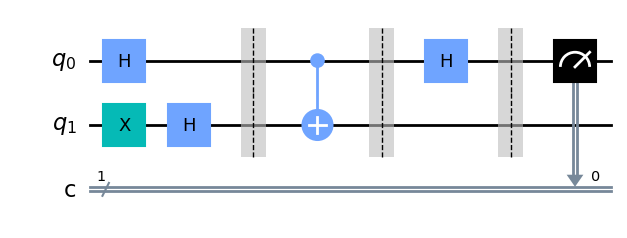

In [1]:
from qiskit import QuantumCircuit, execute, BasicAer

n=1
circuit = QuantumCircuit(n+1, n)
circuit.x(n)  #Setzt den Zustand von q_1 auf |1> (von Kopf auf Zahl)
circuit.h(0)
circuit.h(1)
circuit.barrier()
circuit.cx(0, 1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.measure(0, 0)
circuit.draw('mpl')


In [2]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend).result().get_counts()
print(result)

{'1': 1024}


**Aufgabe:** Kommentieren Sie die Zeile `circuit.cx(0, 1)`  mit `#` aus, bekommen Sie das Resultat: `{'1': 1024}`. Probieren Sie es selbst aus. Was bedeutet das? Schauen wir, was passiert, wenn wir den Schaltkreis um ein Qubit analog fortsetzen ($n=2$).

## Bernstein-Vazirani-Algorithmus für $n=2$
Wir führen die angefangene Reihe von oben fort, indem wir ein Qubit hinzufügen und den Schaltkreis analog fortsetzen:


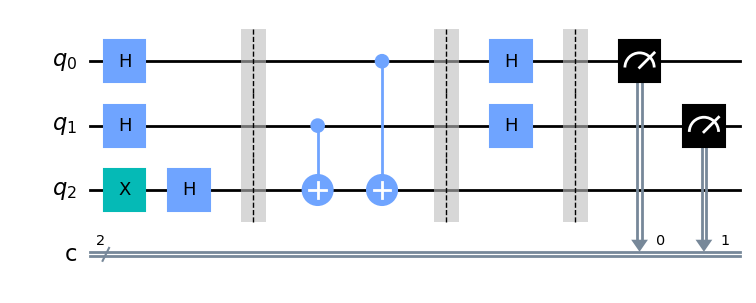

In [3]:
from qiskit import QuantumCircuit, execute, BasicAer

n=2
circuit = QuantumCircuit(n+1, n)
circuit.x(n)  #Setzt den Zustand von q_1 auf |1> (von Kopf auf Zahl)
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.barrier()
circuit.cx(1, 2)
circuit.cx(0, 2)
circuit.barrier()
circuit.h(0)
circuit.h(1)
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw('mpl')


In [4]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend).result().get_counts()
print(result)

{'11': 1024}


**Aufgabe:** Weshalb ist das Resultat jetzt `{'11': 1024}`? Wir haben jetzt zwei $C_x$-Gates ($CNOT$) gesetzt. Insgesammt gibt es vier Möglichkeiten diese zwei $C_x$-Gates zu setzen: keines, `.cx(0, 2)`, `.cx(1, 2)` oder beide, wie im Beispiel. **Probieren** Sie die anderen drei Möglichkeiten durch, notieren Sie sich jeweils das Ergebnis und stellen Sie eine Vermutung zu einer allgemeinen Regel auf.

## Bernstein-Vazirani-Algorithmus für $n=3$
Es sieht so aus, wie wenn die Kontrollbits eine $n$-wertige Binärzahl codieren. Um das zu überprüfen führen die Reihe weiter fort, indem wir noch ein Qubit hinzufügen und die Schaltung analog fortsetzen:

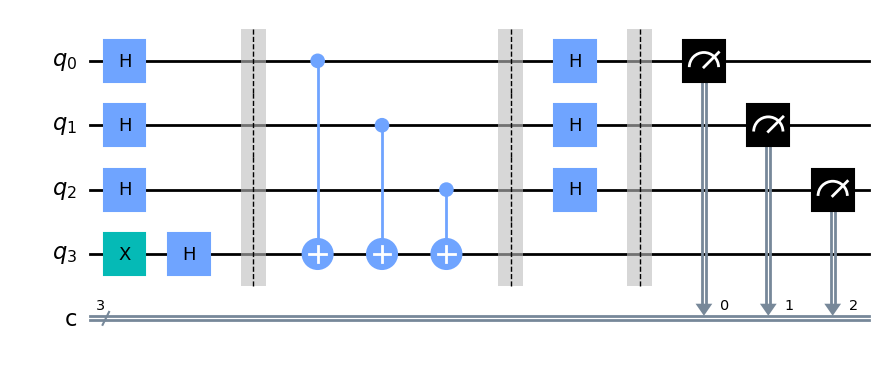

In [5]:
from qiskit import QuantumCircuit, execute, BasicAer

n=3
circuit = QuantumCircuit(n+1, n)
circuit.x(n)  #Setzt den Zustand von q_1 auf |1> (von Kopf auf Zahl)
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(3)
circuit.barrier()
circuit.cx(0, n)
circuit.cx(1, n)
circuit.cx(2, n)
circuit.barrier()
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.barrier()
circuit.measure([0,1,2], [0,1,2])
circuit.draw('mpl')

In [6]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend).result().get_counts()
print(result)

{'111': 1024}


**Aufgabe:** Weshalb ist das Ergebnis jetzt `{'111': 1024}`? Alle drei Kontrollbits sind gesetzt. Haben Wir damit die Binärzahl $111$ codiert? Es gibt nun acht Möglichkeiten, die $CNOTS$ zu setzen. Probieren Sie alle der Reihe nach aus und notieren Sie sich wieder die Resultate! Bestätigt sich Ihre Vermutung vom Beispiel oben mit $n=2$?

## Feste Eingabe einer 4-Bit Zufallszahl ($n=4$)<a name="fest"></a>

Sicher hat sich Ihre Vermutung bestätigt. Mit den Kontrollbits der $C_x$-Gates lassen sich $n$-Wetige Binärzahlen codieren. Sicherheitshalber erweitern wir die Schaltung noch einmal um ein weiteres Qubit und setzen den Schaltkreis analog fort. Nun wollen wir das Programm aber so gestalten, dass wir zu Begin eine vierstellige Binärzahl eingeben und das Programm dann die $C_x$-Gates, entsprechend der Eingabe selbst setzt. Das erfordert den Einsatz von elementaren Python Operationen:

Dazu müssen wir die eingegebene Zeichenkette der Nullen und Einsen analysieren. Dies geschieht mit einer `for`-Schleife und der Funktion `enumerate`. Diese Konstruktion wird [hier](https://www.ionos.de/digitalguide/websites/web-entwicklung/python-enumerate/) näher erläutert. Mit einer `if`-Abfrage wird `circuit.cx(i, 4)` nur dann gesetzt, wenn in der Zeichenkette eine `'1'` steht. Aufgrund der umgekehrten Bit-Reihenfolge in Qiskit muss die eingegebene Zeichenkette umgedreht werden. Dies geschieht mit der Funktion `reversed`. Die `for`-Schleife ist im Listing unten deutlich markiert:

In dieser Reihenfolge wurden Nullen und Einsen aus unserer Eingabe herausgelesen. Vergleichen Sie mit den gesetzten Kontrollbits der C_x:
1
0
1
1


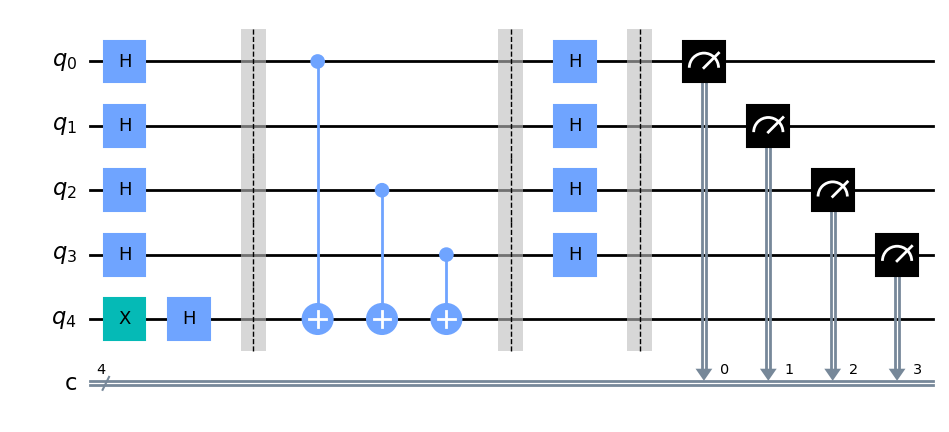

In [7]:
from qiskit import QuantumCircuit, execute, BasicAer

n=4
geheimzahl='1101'
#geheimzahl = input("Geben Sie eine binäre Geheimzahl ein") 
circuit = QuantumCircuit(n+1, n)
circuit.x(n)  #Setzt den Zustand von q_n auf |1>
circuit.h([0, 1, 2, 3, 4])
circuit.barrier()

# for-Schleife zur Analyse der Eingabe -----------------------------------------------------------------------------------------------------------
print('In dieser Reihenfolge wurden Nullen und Einsen aus unserer Eingabe herausgelesen. Vergleichen Sie mit den gesetzten Kontrollbits der C_x:')  
for i, test in enumerate(reversed(geheimzahl)):
    print (test) #sicherheitshalber printen wir die herausgelesenen Werte zusätzlich aus
    if test=='1':
        circuit.cx(i, 4)
# ------------------------------------------------------------------------------------------------------------------------------------------------      

circuit.barrier()
circuit.h([0, 1, 2, 3])
circuit.barrier()
circuit.measure([0,1,2,3],[0,1,2,3])
circuit.draw('mpl')


In [8]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend).result().get_counts()
print(result)

{'1101': 1024}


Die herausgelesene Geheimzahl stimmt mit der Eingabe überein!

## Eingabe einer Geheimzahl beliebiger Länge

Das letzte Beispiel funktioniert nur, wenn man eine vierstellige Binärzahl eingibt. Nun wollen wir das Programm so erweitern, dass mittels einer Eingabeaufforderung eine beliebig lange Binärzahl eingegeben werden kann. Dies geschieht mit der Funktion `input`.

Anschliessend muss die Länge der eingegebenen Zeichenkette, bestehend aus Nullen und Einsen, bestimmt werden. Dies geschieht mit der Funktion `len`. Gegenüber unserem letzten Beispiel mit $n=4$ müssen wir nun überall im Listing anstelle einer $4$ die Anweisung `len(geheimzahl)` setzen. Und das war es schon. 

In [19]:
geheimzahl = input("Geben Sie eine binäre Geheimzahl ein und starten Sie das Programm:") 

Geben Sie eine binäre Geheimzahl ein und starten Sie das Programm: 0110011001


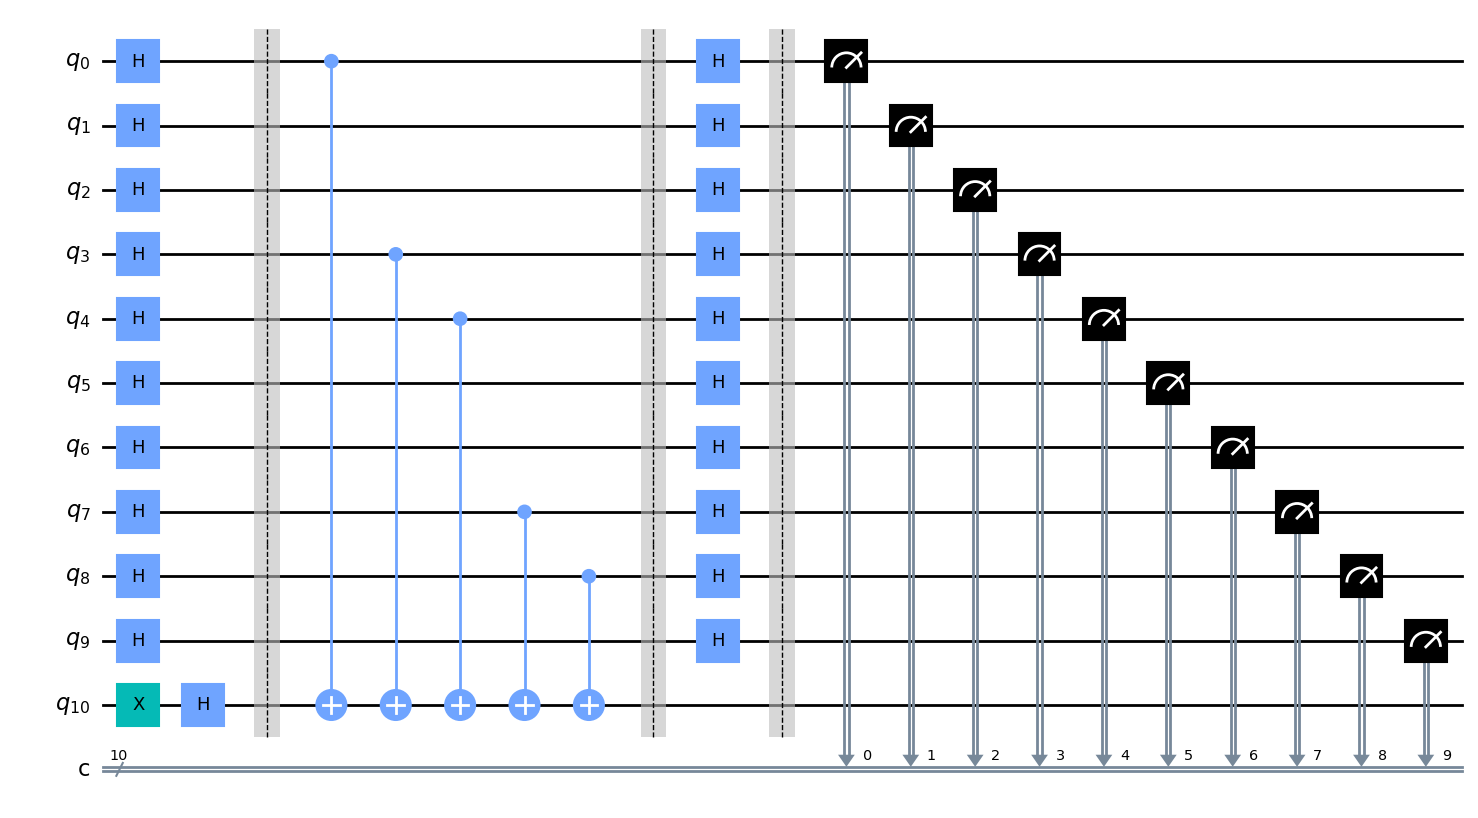

In [20]:
from qiskit import QuantumCircuit, execute, BasicAer

vqc = QuantumCircuit(len(geheimzahl)+1,len(geheimzahl))
vqc.h(range(len(geheimzahl)))
vqc.x(len(geheimzahl))
vqc.h(len(geheimzahl))
vqc.barrier()

for i, test in enumerate(reversed(geheimzahl)):
    if test == "1":
        vqc.cx(i, len(geheimzahl))
              
vqc.barrier()
vqc.h(range(len(geheimzahl)))
vqc.barrier()
vqc.measure(range(len(geheimzahl)),range(len(geheimzahl)))
vqc.draw('mpl')

In [21]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(vqc, backend).result().get_counts()
print(result)

{'0110011001': 1024}


**Kontrolle:** Wir überprüfen das Ergebnis, indem wir die eingegebene Geheimzahl noch einmal ausdrucken. So können wir die beiden Werte direkt miteinander vergleichen:

In [22]:
print(geheimzahl)

0110011001


## Beispiel Keksdosen

Bei der Einführung in die Quanteninformatik in Kap. 16.1 auf S. 180 im Buch hatten wir das Beispiel mit den Keksdosen beschhrieben: Gegeben waren acht Keksdosen numeriert von $0$ ... $7$. In der Dose 6 sind unsere Lieblingskekse. Um das herauszufinden sind drei Entscheidungsfragen erforderlich. Die Informationsmenge beträgt deshalb 3 Bit.

Haben wir diese Information hingegen in einem Quantencomputer mit dem obigen Schaltkreis codiert, genügt **eine Abfrage**, um die Nummer der gewünschten Dose zu finden. Probieren Sie es selbst!

**Aufgabe:** Geben Sie im letzten Beispiel oben die Geheimzahl $00000010$ ein! Vergewissern Sie Sich, dass mit dem Bernstein-Vazirani-Algorithmus mit einem Durchgang (Mit einem Blick bzw. mit einer Frage) die Nummer der gesuchten Dose gefunden wird.